### Removal of clear outliers in S. enterica
Maximum contamination value and minimum quality value.

In [1]:
species='Salmonella_enterica'

In [2]:
## Import all CheckM quality results
file='quality-data/' + species + '.txt'

# Start lists of values to plot
Completeness = []
Contamination = []
Quality = []

# Loop through file to get results
with open(file, 'r') as fh:
    for line in fh:
        line = line.strip('\n').split(' ')
        genome = line[0]
        # Add each value to corresponding list
        Completeness.append( float( line[1] ) )
        Contamination.append( float( line[2] ) )
        Quality.append( float( line[3] ) )

In [3]:
## Find numbers of genomes that meet quality thresholds
# Completeness > 80%
# Contamination < 4%
# Quality > 80%

n_quality_genomes=0
for i in range(len(Quality)):
    if all( ( Completeness[i] > 80, Contamination[i] < 4, Quality[i] > 80 ) ):
        n_quality_genomes += 1

In [4]:
## Import packages
import numpy as np
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
from matplotlib import rc

In [5]:
## Increase font sizes
plt.rcParams.update({'font.size': 14})

In [6]:
Contamination.remove(max(Contamination))

In [7]:
Quality.remove(min(Quality))

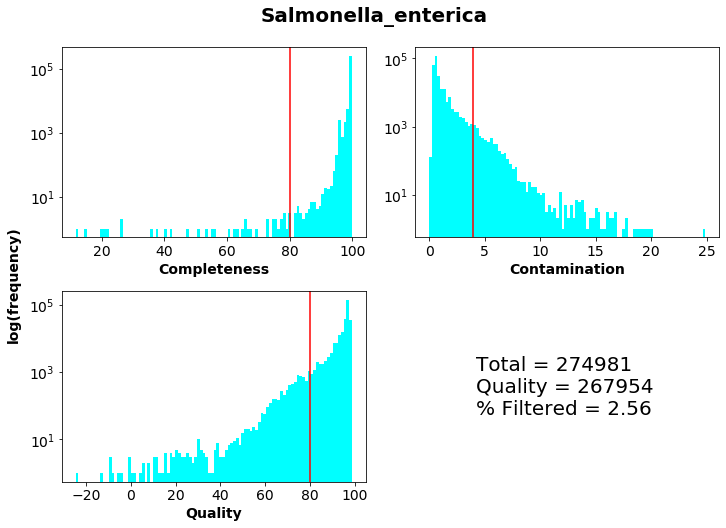

In [8]:
## Plot the figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,7))
fig.suptitle(species, fontweight='bold', fontsize=20, y=1.05)
fig.text(0, 0.5, 'log(frequency)', va='center', ha='center', rotation='vertical', fontweight='bold')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

# ax1 ax2
# ax3 ax4

# Completeness Contamination
# Quality Number_of_genomes

ax1.set_xlabel('Completeness', fontweight='bold')
ax1.hist(Completeness, 100, color='cyan')
ax1.axvline(80, color='red')

ax2.set_xlabel('Contamination', fontweight='bold')
ax2.hist(Contamination, 100, color='cyan')
ax2.axvline(4, color='red')

ax3.set_xlabel('Quality', fontweight='bold')
ax3.hist(Quality, 100, color='cyan')
ax3.axvline(80, color='red')

N=len(Contamination)
text1=f"Total = {N}"
text2=f"Quality = {n_quality_genomes}"
text3=f"% Filtered = {round( 100-100*n_quality_genomes/N, 2 )}"
text=text1+'\n'+text2+'\n'+text3

ax4.text(0.2, 0.5, text, va='center', ha='left', fontsize=20)
ax4.axis('off')

fig.tight_layout()
savefile=f"plots/{species}.png"
plt.savefig(savefile, bbox_inches='tight', dpi=600)